In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='paper', rc={'figure.figsize':(1,10)})
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [123]:
full_data = pd.read_csv("Dataset.csv")
data = pd.read_csv("Dataset.csv")
metadata = pd.read_csv("Metadata_bt.csv")

### Drop the Gene column from the data and create df for PCA

In [124]:
data.drop('Gene', axis='columns', inplace=True)
scaled_data = StandardScaler().fit_transform(data.T)

In [125]:
pca = PCA(n_components=20)
pca.fit(scaled_data)
print(end="")

In [126]:
pca.components_

array([[-6.50598498e-03,  1.00485620e-02,  8.79330858e-03, ...,
         5.57429762e-03,  4.18425549e-03,  3.68117088e-03],
       [ 7.07767376e-03, -1.36112167e-03, -3.74391256e-03, ...,
         1.42414430e-03,  1.41875569e-03,  1.85148531e-03],
       [-5.53826910e-03,  1.17286358e-03,  1.12397297e-02, ...,
         8.51133013e-03,  1.21641638e-02,  1.47625459e-02],
       ...,
       [ 2.60119232e-03, -1.07477790e-02, -5.24782562e-03, ...,
        -6.16025282e-04,  3.85095780e-03,  5.25658955e-04],
       [-8.86594689e-04, -2.06464260e-04, -3.04017846e-03, ...,
        -2.36249632e-04,  9.07874661e-04,  8.98843974e-05],
       [-2.24041964e-01, -4.02253520e-02,  8.30015747e-01, ...,
        -1.74155543e-04, -4.82995170e-04,  1.02545409e-03]])

In [127]:
pca.singular_values_

array([3.70035402e+02, 2.52435238e+02, 2.10302125e+02, 2.01160886e+02,
       1.68939588e+02, 1.34773036e+02, 1.32139874e+02, 1.18860778e+02,
       1.08649908e+02, 9.08369791e+01, 7.81897792e+01, 5.69603417e+01,
       5.35693958e+01, 4.91678850e+01, 4.70259049e+01, 4.47269060e+01,
       2.91087485e+01, 2.53539681e+01, 2.00215627e+01, 4.17406302e-13])

### Principal Component Analysis (PCA)

In [128]:
pca.explained_variance_ratio_

array([3.38557508e-01, 1.57559957e-01, 1.09353634e-01, 1.00053660e-01,
       7.05681541e-02, 4.49109169e-02, 4.31731439e-02, 3.49319664e-02,
       2.91880192e-02, 2.04019305e-02, 1.51163128e-02, 8.02215539e-03,
       7.09544101e-03, 5.97735366e-03, 5.46789570e-03, 4.94633598e-03,
       2.09504312e-03, 1.58941672e-03, 9.91155608e-04, 4.30788302e-31])

In [211]:
sum(pca.explained_variance_ratio_[:2])

0.4961174654822009

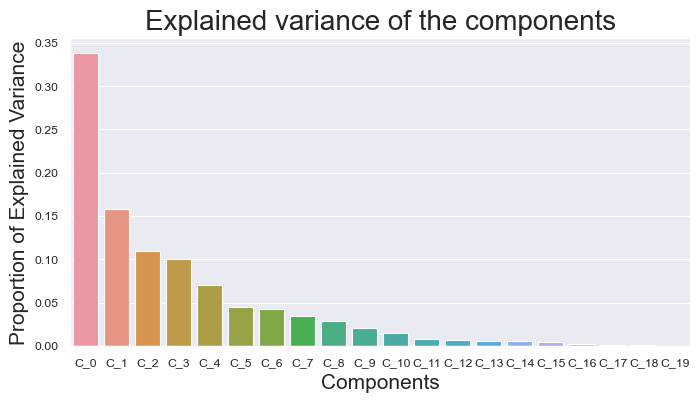

In [129]:
plt.figure(figsize=(8,4))
sns.barplot( y = pca.explained_variance_ratio_, x = [f'C_{i}' for i in range(data.shape[1])] )
plt.title('Explained variance of the components', size=20)
plt.xlabel('Components', size=15)
plt.ylabel('Proportion of Explained Variance', size=15)
plt.show()

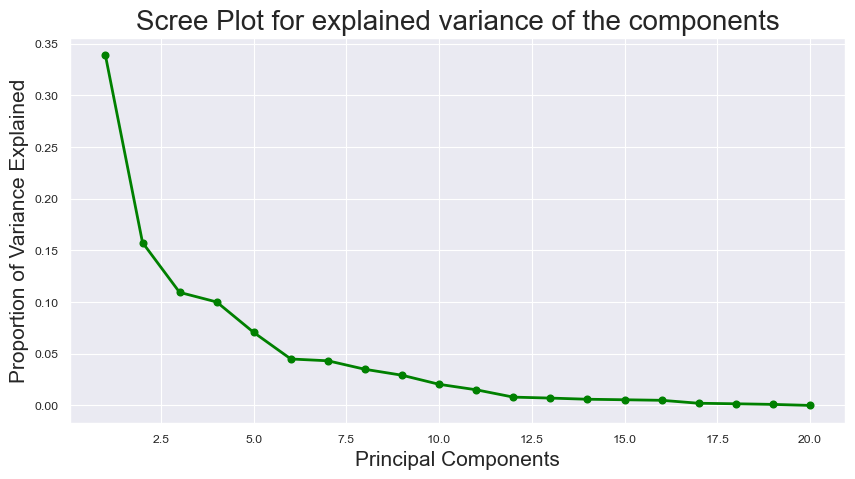

In [201]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10,5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='green')
plt.title('Scree Plot for explained variance of the components', size=20)
plt.xlabel('Principal Components', size=15)
plt.ylabel('Proportion of Variance Explained', size=15)
plt.show()

### Transforming data to lower dimensions

In [131]:
transformed_data = pca.transform(scaled_data)
print(transformed_data[:2])

[[ 1.74516781e+00 -2.92090503e+01  2.37325748e+01 -2.06415879e+00
   1.17293758e+00  2.03769635e+00 -2.47380246e+01  1.68148255e+01
   1.95995311e+01  5.02406725e+01 -2.95762791e+01 -3.36737371e+01
   9.42973413e+00 -9.07674057e-02  2.03829876e+00 -1.54075635e+00
  -1.29695386e+00  9.31916843e-01  7.84425719e-04  1.83152105e-13]
 [ 2.21675735e+00 -2.97501717e+01  1.57807273e+01 -1.03823462e+01
  -1.06182582e+01  1.58749943e+00 -1.91413537e+01  2.85707878e+01
   3.09588316e-01  4.00996028e+01 -1.64544925e+01  3.81237567e+01
  -1.62095119e+01 -4.18148571e+00 -9.58645444e+00 -3.27446492e+00
   2.88857917e+00  1.18531775e+00  1.42590597e-01  6.23919319e-14]]


### Converting into dataframe for PCA plot

In [135]:
transformed_df = pd.DataFrame(data = transformed_data, columns=[f'C_{i+1}' for i in range(data.shape[1])])
transformed_df['Cell line/Tissue'] = metadata["Cell line/Tissue"]
transformed_df

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_12,C_13,C_14,C_15,C_16,C_17,C_18,C_19,C_20,Cell line/Tissue
0,1.745168,-29.209050,23.732575,-2.064159,1.172938,2.037696,-24.738025,16.814825,19.599531,50.240673,...,-33.673737,9.429734,-0.090767,2.038299,-1.540756,-1.296954,0.931917,0.000784,1.831521e-13,K1
1,2.216757,-29.750172,15.780727,-10.382346,-10.618258,1.587499,-19.141354,28.570788,0.309588,40.099603,...,38.123757,-16.209512,-4.181486,-9.586454,-3.274465,2.888579,1.185318,0.142591,6.239193e-14,K1
2,129.572111,20.649035,53.764695,33.943372,13.693890,104.498042,-37.033661,-9.911274,1.445209,-11.815256,...,0.979673,-0.053487,1.651679,-0.163504,1.948770,-0.739510,-0.771906,-0.124450,1.118784e-13,K1
3,121.021355,2.447245,137.215381,69.177793,12.841333,-66.945445,16.050916,-17.788982,-6.253468,-6.473102,...,1.352000,-0.399396,-0.127286,0.344826,0.360111,-0.010757,0.076277,0.007391,-2.129200e-13,K1
4,-34.933643,-39.657465,12.902652,-20.195516,-7.504075,0.639614,8.390783,18.339587,3.721943,18.273783,...,4.881599,-1.165999,2.702697,36.057799,4.390607,1.226093,0.772902,-0.281175,-6.461737e-15,DG44
5,-51.888419,-44.707512,16.673886,-24.973671,-4.891628,1.580067,15.529324,3.057915,2.040219,14.124382,...,-12.923636,-3.698787,-2.650409,-26.494010,-5.610566,0.264584,-0.352216,0.437035,-9.237381e-14,DG44
6,-39.125003,-31.618953,18.945445,-22.304163,-2.118209,22.145764,57.888583,4.933487,3.497346,-5.806047,...,15.170224,40.615777,-1.288491,-3.358053,-3.304657,0.290457,0.747203,0.094642,3.511427e-14,DG44
7,-43.549966,-28.981966,20.733723,-24.211990,0.330228,31.353598,82.528807,1.091329,2.987409,-16.094690,...,-10.521615,-28.832113,0.424107,2.342163,2.168621,-0.224126,-0.486433,-0.060275,-4.811212e-13,DG44
8,155.445414,32.308645,-57.554943,-7.492348,-1.341108,-17.700344,3.825545,51.227318,28.147395,-23.403395,...,-2.667749,-1.640123,-4.836321,3.175936,-25.092368,-2.710561,-0.997149,-0.259878,-3.422603e-13,DXB11
9,91.786814,11.273447,-43.766727,-11.526799,-0.523853,-18.859603,0.324925,36.914725,25.009049,-12.438432,...,-0.580528,2.666622,6.641924,-8.420786,34.288471,2.498461,1.455350,0.337817,7.049526e-14,DXB11


### Plotting the PCA of first two components

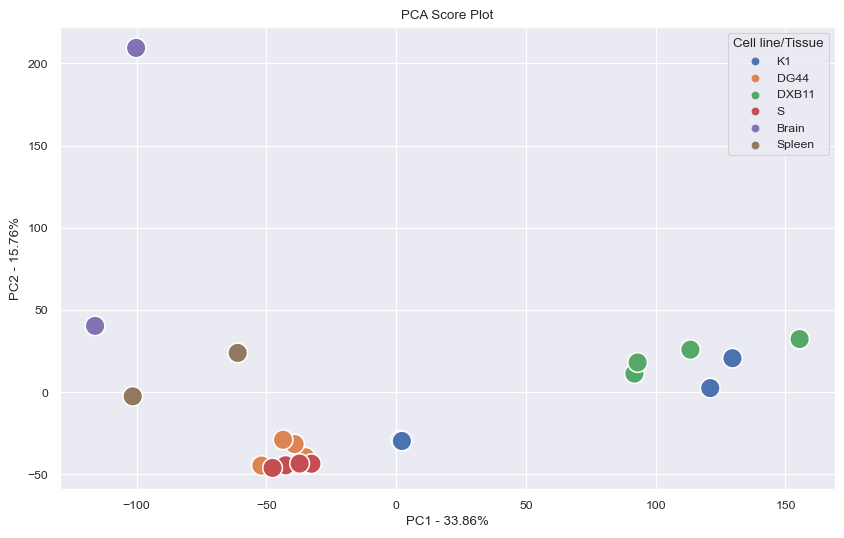

In [203]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    data = transformed_df,
    x='C_1',
    y='C_2',
    hue = 'Cell line/Tissue',
    s=200
)
ax.set_xlabel(f"PC1 - {pca.explained_variance_ratio_[0]*100:.2f}%")
ax.set_ylabel(f"PC2 - {pca.explained_variance_ratio_[1]*100:.2f}%")
ax.set_title("PCA Score Plot")
plt.show()

### Identify top contributor gene for the first two PCs

In [179]:
# Get the contributions for each gene on each PC
loadings = pca.components_.T

# Select top contributors absolute values) for PC1 and PC2
top_n_pc1 = 20
top_n_pc2 = 20

# Get gene names
gene_names = full_data["Gene"]

# Get absolute loadings for PC1 and PC2
abs_loadings_pc1 = np.abs(loadings[:, 0])
abs_loadings_pc2 = np.abs(loadings[:, 1])

# Sort genes by absolute loadings for PC1 and PC2 (descending order)
sorted_idx_pc1 = np.argsort(abs_loadings_pc1)[::-1][:top_n_pc1]  # Top n genes with highest loadings
sorted_idx_pc2 = np.argsort(abs_loadings_pc2)[::-1][:top_n_pc2]

# Get top contributing gene names for PC1 and PC2
top_genes_pc1 = gene_names[sorted_idx_pc1]
top_loadings_pc1 = loadings[sorted_idx_pc1, 0]
pc1_top = [list(top_genes_pc1), list(top_loadings_pc1)]

top_genes_pc2 = gene_names[sorted_idx_pc2]
top_loadings_pc2 = loadings[sorted_idx_pc2, 1]
pc2_top = [list(top_genes_pc2), list(top_loadings_pc2)]

In [196]:
top_pc1 = pd.DataFrame(list(top_genes_pc1))
se = pd.Series(list(top_loadings_pc1))
top_pc1["Coefficient"] = se.values
top_pc2 = pd.DataFrame(list(top_genes_pc2))
se = pd.Series(list(top_loadings_pc2))
top_pc2["Coefficient"] = se.values

In [197]:
# Print top contributing genes
print("Top", top_n_pc1, "contributing genes for PC1:")
top_pc1

Top 20 contributing genes for PC1:


,0,Coefficient
0,Rassf3_1,0.011930
1,Szrd1_1,0.011926
2,Mlh1_1,0.011879
3,Pigw_1,0.011871
4,Adpgk_1,0.011862
5,Cep135_2,0.011855
6,LOC100773300_2,0.011848
7,Styx_1,0.011844
8,Tor3a_1,0.011830
9,Zdhhc3_1,0.011819


In [198]:
print("\nTop", top_n_pc2, "contributing genes for PC2:")
top_pc2


Top 20 contributing genes for PC2:


,0,Coefficient
0,Trim36_1,0.017212
1,Dapk1_1,0.017193
2,Chd3_1,0.016973
3,Ano7_1,0.016914
4,Bhmg1_1,0.016914
5,Foxred2_1,0.016908
6,Smpd3_1,0.016865
7,Fam189b_1,0.016857
8,CUNH2orf88_1,0.016839
9,Mmp24_1,0.016829
